In [2]:
!pip install neuralprophet

     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 748.8MB 23kB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101


In [3]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

In [5]:
#load dataset
df = pd.read_csv('Weather_cangi.csv')
df.head()

,Location,Date,Daily Rainfall Total in mm (RT),Highest 30 Min Rainfall in mm (HR30),Highest 60 Min Rainfall in mm (HR60),Highest 120 Min Rainfall in mm (HR120),Mean Temperature celcius (MT),Maximum Temperature in celcius (MaxT),Minimum Temperature in celcius (MinT),Mean Wind Speed in km/h (MW),Max Wind Speed in km/h (MaxW)
0,Changi,1/1/2020,0.0,0,0,0,27.9,31.7,25.6,12.2,39.2
1,Changi,1/2/2020,0.0,0,0,0,27.6,30.7,25.4,11.9,39.6
2,Changi,1/3/2020,0.0,0,0,0,28.0,31.9,26.0,12.6,43.2
3,Changi,1/4/2020,0.0,0,0,0,27.6,31.4,25.8,12.2,39.2
4,Changi,1/5/2020,0.0,0,0,0,27.8,32.0,25.1,12.6,40.7


In [ ]:
#feature combination


In [6]:
df.Location.unique()

array(['Changi'], dtype=object)

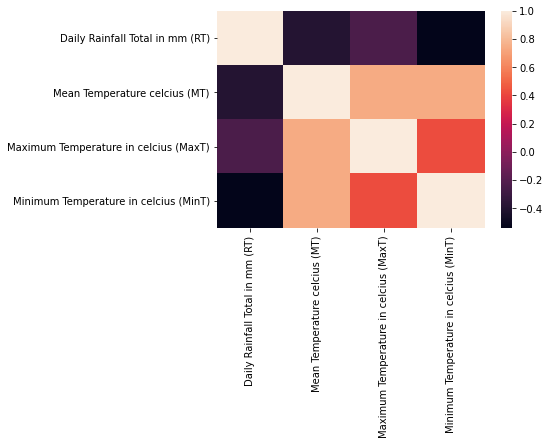

In [7]:
#correlation heatmap
import seaborn as sb
sb.heatmap(df.corr())

In [8]:
df.dtypes

Location                                   object
Date                                       object
Daily Rainfall Total in mm (RT)           float64
Highest 30 Min Rainfall in mm (HR30)       object
Highest 60 Min Rainfall in mm (HR60)       object
Highest 120 Min Rainfall in mm (HR120)     object
Mean Temperature celcius (MT)             float64
Maximum Temperature in celcius (MaxT)     float64
Minimum Temperature in celcius (MinT)     float64
Mean Wind Speed in km/h (MW)               object
Max Wind Speed in km/h (MaxW)              object
dtype: object

In [9]:

changi=df[df['Location']=='Changi']
changi['Date'] = pd.to_datetime(changi['Date'])
changi.head()

,Location,Date,Daily Rainfall Total in mm (RT),Highest 30 Min Rainfall in mm (HR30),Highest 60 Min Rainfall in mm (HR60),Highest 120 Min Rainfall in mm (HR120),Mean Temperature celcius (MT),Maximum Temperature in celcius (MaxT),Minimum Temperature in celcius (MinT),Mean Wind Speed in km/h (MW),Max Wind Speed in km/h (MaxW)
0,Changi,2020-01-01,0.0,0,0,0,27.9,31.7,25.6,12.2,39.2
1,Changi,2020-01-02,0.0,0,0,0,27.6,30.7,25.4,11.9,39.6
2,Changi,2020-01-03,0.0,0,0,0,28.0,31.9,26.0,12.6,43.2
3,Changi,2020-01-04,0.0,0,0,0,27.6,31.4,25.8,12.2,39.2
4,Changi,2020-01-05,0.0,0,0,0,27.8,32.0,25.1,12.6,40.7


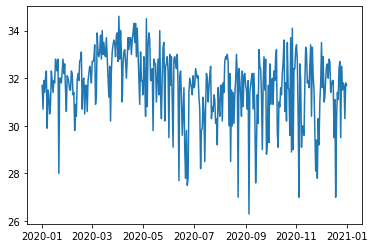

In [10]:
plt.plot(changi['Date'], changi['Maximum Temperature in celcius (MaxT)'])
plt.show()

In [11]:
data = changi[['Date', 'Maximum Temperature in celcius (MaxT)']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,2020-01-01,31.7
1,2020-01-02,30.7
2,2020-01-03,31.9
3,2020-01-04,31.4
4,2020-01-05,32.0


In [28]:
m = NeuralProphet()
# df_train, df_val = m.split_df(df, valid_p=0.2)
# train_metrics = m.fit(df_train)
# val_metrics = m.test(df_val)
model = m.fit (data, freq='D' ,validate_each_epoch=False, epochs=2000)

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[2000/2000]: 100%|██████████| 2000/2000 [02:17<00:00, 14.57it/s, SmoothL1Loss=0.0108, MAE=0.983, RegLoss=0]


In [29]:
future = m.make_future_dataframe(data, periods=150)
forecast = m.predict(future)
forecast.head()


,ds,y,yhat1,residual1,trend,season_weekly
0,2021-01-01,None,31.588316,NaN,31.376661,0.211654
1,2021-01-02,None,31.145607,NaN,31.377350,-0.231741
2,2021-01-03,None,31.345482,NaN,31.378036,-0.032553
3,2021-01-04,None,31.335735,NaN,31.378723,-0.042989
4,2021-01-05,None,31.355171,NaN,31.379412,-0.024239


In [30]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_weekly
145,2021-05-26,None,31.358671,NaN,31.476358,-0.117687
146,2021-05-27,None,31.714602,NaN,31.477045,0.237556
147,2021-05-28,None,31.689388,NaN,31.477734,0.211654
148,2021-05-29,None,31.246679,NaN,31.478420,-0.231741
149,2021-05-30,None,31.446554,NaN,31.479109,-0.032553


In [31]:
print(forecast)

            ds     y      yhat1 residual1      trend  season_weekly
0   2021-01-01  None  31.588316      None  31.376661       0.211654
1   2021-01-02  None  31.145607      None  31.377350      -0.231741
2   2021-01-03  None  31.345482      None  31.378036      -0.032553
3   2021-01-04  None  31.335735      None  31.378723      -0.042989
4   2021-01-05  None  31.355171      None  31.379412      -0.024239
..         ...   ...        ...       ...        ...            ...
145 2021-05-26  None  31.358671      None  31.476358      -0.117687
146 2021-05-27  None  31.714602      None  31.477045       0.237556
147 2021-05-28  None  31.689388      None  31.477734       0.211654
148 2021-05-29  None  31.246679      None  31.478420      -0.231741
149 2021-05-30  None  31.446554      None  31.479109      -0.032553

[150 rows x 6 columns]


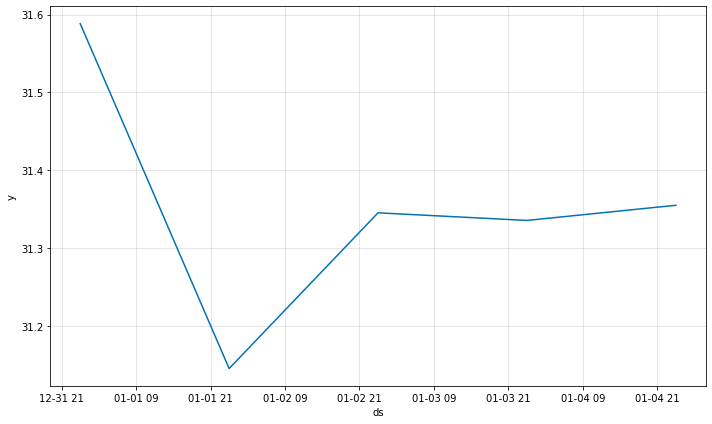

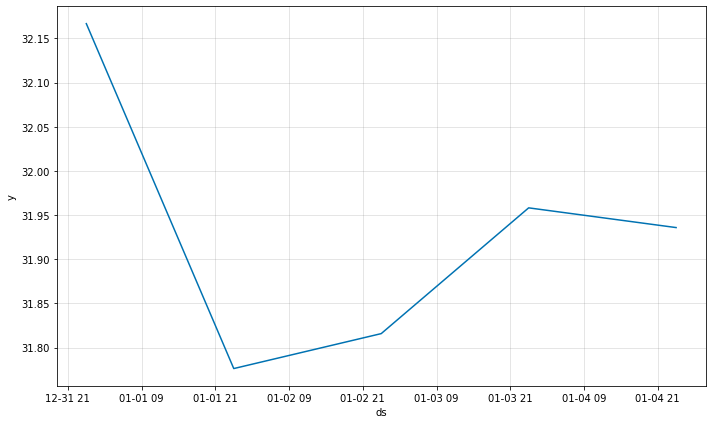

In [27]:
plot1 = m.plot(forecast)

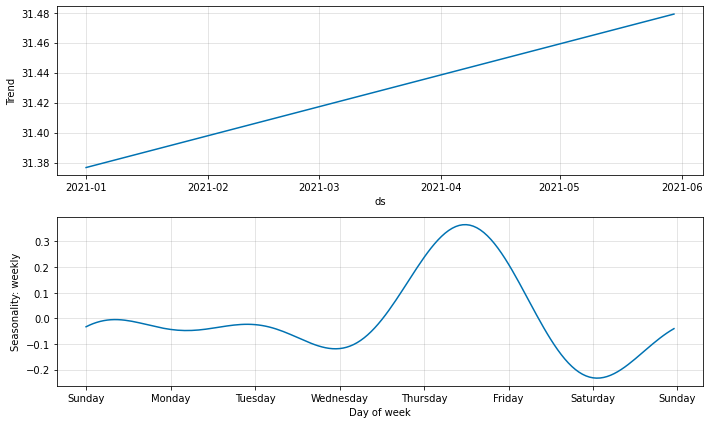

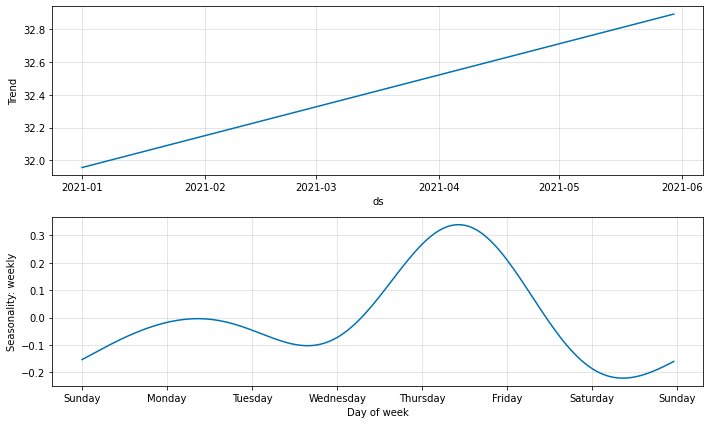

In [26]:
#ds= time frame
#y = mean temperature at time frame
plt2 = m.plot_components(forecast)